<a href="https://colab.research.google.com/github/lasupernova/Tensorflow_apps/blob/master/Food_Vision_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
#ensure GPU compute capability is > 7.0 in order to use mixed precision training acceleration
# here: Tesla T4 needed
!nvidia-smi -L

GPU 0: Tesla K80 (UUID: GPU-e169beb1-2360-d6a4-ece4-298da324c671)


In [49]:
#download helper functions script from Github
!wget https://raw.githubusercontent.com/lasupernova/Tensorflow_apps/master/helpers.py

--2021-09-25 23:31:04--  https://raw.githubusercontent.com/lasupernova/Tensorflow_apps/master/helpers.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10252 (10K) [text/plain]
Saving to: ‘helpers.py.1’

helpers.py.1        100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-09-25 23:31:04 (73.0 MB/s) - ‘helpers.py.1’ saved [10252/10252]



In [50]:
import tensorflow as tf

In [51]:
#import helper functions from script
from helpers import create_tensorboard_callback, plot_loss_curves#, compare_histories

##Load Data

In [52]:
#import tf Datasets to download Food 101 dataset using later on 
import tensorflow_datasets as tfds

In [53]:
#overview of all available datasets
datasets_list = tfds.list_builders()

In [54]:
datasets_list;

In [55]:
#load food101 data from tf Datasets
(train_data, test_data), food_info = tfds.load(name="food101",
                                               split=["train", "validation"],
                                               shuffle_files=True,
                                               as_supervised=True,
                                               with_info=True)

##Explore Data

In [56]:
#get to know dataset
food_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=101),
})

In [57]:
#get class names
class_names = food_info.features["label"].names
class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [58]:
train_data

<_OptionsDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>

In [78]:
import matplotlib.pyplot as plt
def explore_data(num_images=9):
  for i in range(num_images):
    train_sample_explore = train_data.take(1)
    # train_sample_explore
    #each sample comes with data (here: image) and a label
    for img, label in train_sample_explore:
      # print(label)  #label is a tensor containing the image class number --> convert to number/np-array (using numpy) in order to translate to class_name
      shape = img.shape
      datatype= img.dtype.name
      img_label = class_names[label.numpy()]
      #Get min and max values in image tensor
      min_val = tf.reduce_min(img); max_val=tf.reduce_max(img)
      normalized = (min_val.numpy()==0 and max_val.numpy()==1)
      normalized_str = "True (min:0, max:1)" if normalized else f'False (value range: {min_val.numpy()} - {max_val.numpy()})'
      info_str = f"""Image has the following features:
          Shape:       {shape}
          dtype:       {datatype}
          Class Name:  {img_label}
          Dataset target class tensor form: {label}
          Normalized:  {normalized_str}"""
    #Plot selected image
    ax=plt.subplot(3,3,i+1)
    plt.imshow(img)
    plt.title(img_label)
    plt.text(x=shape[1]*1.05,y=shape[0]/2,s=info_str)
    ax=plt.gca()
    ax.set_axis_off()  #or use plt.axis(False)
    plt.show()

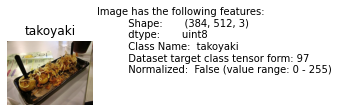

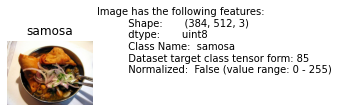

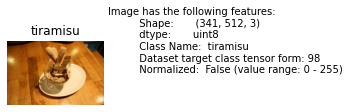

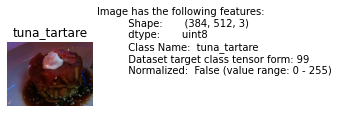

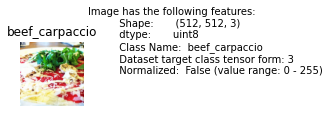

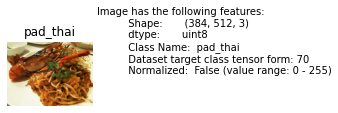

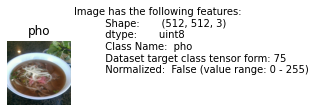

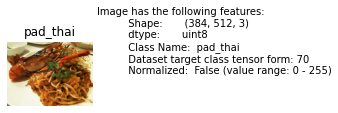

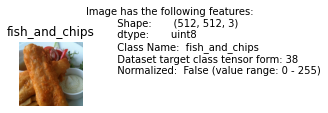

In [79]:
explore_data()

NOTE: image tensor is not yet normalized (as min - max values are not 0 and 1)

NOTE: dataset labels are *NOT* one-hot encoded as the target class tensor contains **one** individual number as opposed to aan array/ a list of the form [0,0,0,1....,0,0]. <br><br>
Additionally, running the cell above for multiple images has shown, that images are *not* of same shape (for height and width).